Dataset:
http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv

Problem:
    
For this task we want to see how a simple analysis using group_by can provide insight into categorizing the different Iris Species. Please complete the following:

   1. Import the Iris dataset, path is already provided.
   1. Run a groupby on Species type, generating the mean of C1-C4 for each group.
   1. Build a K-Means model with 3 centeroids.
   1. Compare the simple aggregated data with the K-Means model, just meaningful explanation or code to showing difference would be acceptable.

In [71]:
import h2o
h2o.init()
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         1 hour 59 mins
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.2
H2O cluster version age:    1 month and 10 days
H2O cluster name:           H2O_from_python_mihirzgr8_echxp9
H2O cluster total nodes:    1
H2O cluster free memory:    1.760 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.6.1 final
--------------------------  ----------------------------------------

In [9]:
#Import the dataset in an h2o dataframe
iris = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris_df = h2o.import_file(path=iris)
iris_df.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(150, 5)

In [10]:
iris_df.describe()

Rows:150
Cols:5




sepal_len sepal_wid petal_len petal_wid class 
 
 
 type real real real real enum 
 mins 4.3 2.0 1.0 0.1 
 mean 5.843333333333333 3.053999999999999 3.758666666666667 1.1986666666666665 
 maxs 7.9 4.4 6.9 2.5 
 sigma 0.8280661279778637 0.43359431136217375 1.764420419952262 0.7631607417008414 
 zeros 0 0 0 0 
 missing 0 0 0 0 0 
 0 5.1 3.5 1.4 0.2 Iris-setosa 
 1 4.9 3.0 1.4 0.2 Iris-setosa 
 2 4.7 3.2 1.3 0.2 Iris-setosa 
 3 4.6 3.1 1.5 0.2 Iris-setosa 
 4 5.0 3.6 1.4 0.2 Iris-setosa 
 5 5.4 3.9 1.7 0.4 Iris-setosa 
 6 4.6 3.4 1.4 0.3 Iris-setosa 
 7 5.0 3.4 1.5 0.2 Iris-setosa 
 8 4.4 2.9 1.4 0.2 Iris-setosa 
 9 4.9 3.1 1.5 0.1 Iris-setosa

In [18]:
iris_df.columns


['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [19]:
cols_1=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [20]:
cols_2=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

In [93]:
iris_df[cols_1].group_by(by='class').mean(cols_2, na ="ignore").get_frame()

class mean_sepal_len mean_sepal_wid mean_petal_len mean_petal_wid 
 
 
 Iris-setosa 5.006 3.418 1.464 0.244 
 Iris-versicolor 5.936 2.77 4.26 1.326 
 Iris-virginica 6.588 2.974 5.552 2.026

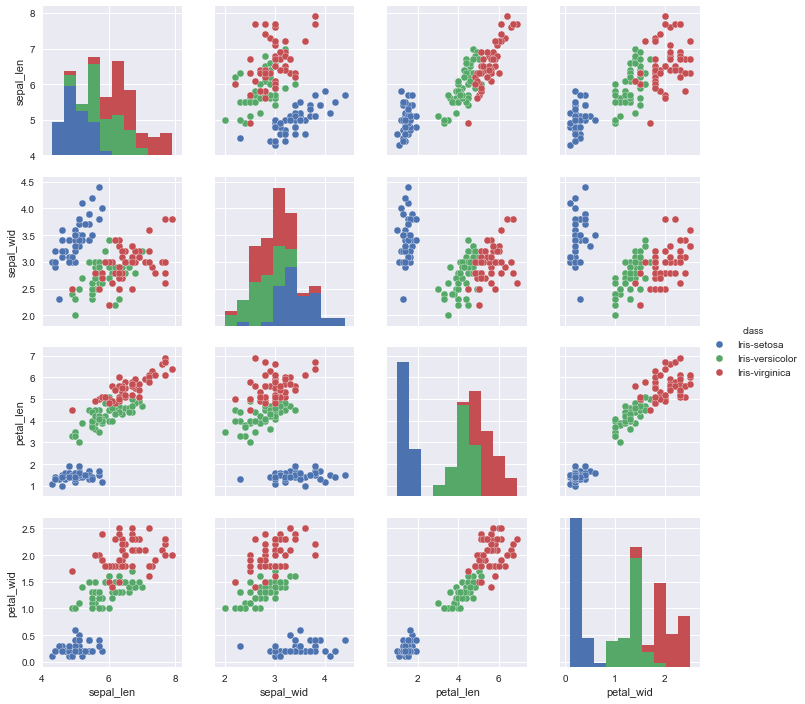

In [47]:
sns.set_context("notebook")
sns.pairplot(iris_df.as_data_frame(True), vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"], hue="class");

In [37]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [95]:
# convert response column to a factor
iris_df['class'] = iris_df['class'].asfactor()

# set the predictor names
predictors = iris_df.columns[:-1]

# split into train and validation sets
train, valid = iris_df.split_frame(ratios = [.8], seed = 1234)

# estimator to train the model, parameters as under: 

# k =the upper limit of classes to consider/ number of clusters
# k-estimate= True inorder to estimate number of clusters
# standardize= False since the scales for each feature are very close

iris_kmeans = H2OKMeansEstimator(k = 3, estimate_k = True, standardize = False, seed = 1234)
iris_kmeans.train(x = predictors, training_frame = train, validation_frame=valid)




kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [84]:
#Calculate important results obtained from the k-means model

import math as math
import pandas as pd

def diagnostics_from_clusteringmodel(model):
    total_within_sumofsquares = model.tot_withinss()
    number_of_clusters = len(model.centers())
    number_of_dimensions = len(model.centers()[0])
    number_of_rows = sum(model.size())
    
    aic = total_within_sumofsquares + 2 * number_of_dimensions * number_of_clusters
    bic = total_within_sumofsquares + math.log(number_of_rows) * number_of_dimensions * number_of_clusters
    
    return {'Clusters':number_of_clusters,
            'Total Within SS':total_within_sumofsquares, 
            'AIC':aic, 
            'BIC':bic}



In [85]:
diagnostics_from_clusteringmodel(iris_kmeans)

{'AIC': 87.09516069071749,
 'BIC': 120.8413729551865,
 'Clusters': 3,
 'Total Within SS': 63.09516069071749}

## Comparision of results 

Group by and the calculation of mean based on each column provides us with mean of each feature based on the species type. 

K-means operates by grouping points close to each centroid, provides in depth results of which points are closely related and to the mean and which are further away

Key Difference: 
    
    For Group By we must specify the columns we need to group by explicitly by providing column names, which may not be an efficient technique. 
    
    For K-means, we can input any number of features and the algorithm finds the number of clusters, using the "k" parameter we can state the number of centroids. 
    
    "K-estimate" can be set to true to find the number of centroids automatically. 